# Exploratory Data Analysis

In [173]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import folium

# Stores

In [38]:
stores = pd.read_csv('stores.csv', header=0)
stores.head()

,store_nbr,city,state,type,cluster
0,1,Quito,Pichincha,D,13
1,2,Quito,Pichincha,D,13
2,3,Quito,Pichincha,D,8
3,4,Quito,Pichincha,D,9
4,5,Santo Domingo,Santo Domingo de los Tsachilas,D,4


In [110]:
locations = pd.DataFrame(columns=['city','count'])
locations['city'] = stores['city'].value_counts().index.values
locations['count'] = stores['city'].value_counts().tolist()

locations['latitude']=[-0.1807,-2.1710,-0.2389,-2.9001,-1.2543,-0.9677,-3.2581,-0.9316,
                       -0.2714,-1.0225,-2.2234,-0.3392,-1.5905,-1.6636,-0.0320,-1.8622,
                       -2.2306,-1.4924,-2.6285,-4.0079,-1.8019,-0.9682]
locations['longitude']=[-78.4678,-79.9224,-79.1774,-79.0059,-78.6229,-80.7089,-79.9554,-78.6058,
                        -79.4648,-79.4604,-80.9585,-78.1222,-78.9995,-78.6546,-78.1507,-79.9777,
                        -80.9002,-78.0024,-80.3896,-79.2113,-79.5346,-79.6517]


START = [-1.75,-78.6229]
map = folium.Map(location=START, zoom_start=7, height=500, width=900)
for index, loc in locations.iterrows():
    if loc['count']>10:
        c = 'orange'
    elif loc['count']>5:
        c = 'red'
    elif loc['count']==3:
        c='purple'
    elif loc['count']==2:
        c = 'blue'
    else:
        c='black'
    folium.Marker(location = [loc['latitude'],loc['longitude']],icon=folium.Icon(color=c),popup=str(loc['count'])).add_to(map)
display(map)

Counts
* net by store

In [313]:
transactions = pd.read_csv('transactions_clean.csv', header=0)

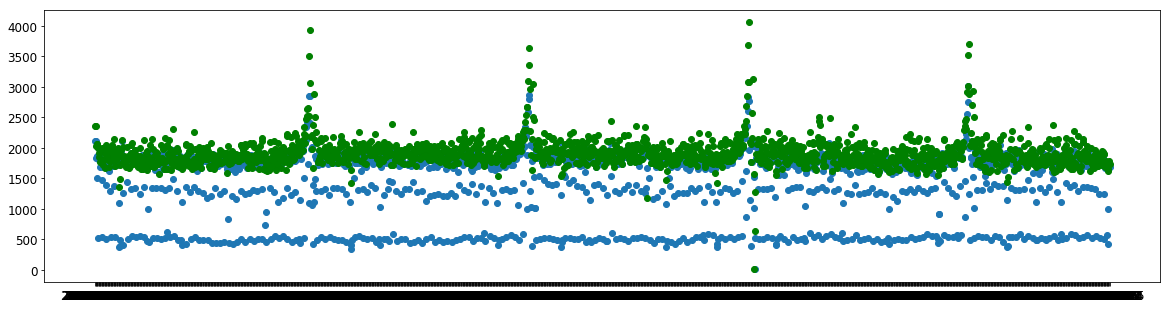

In [319]:
plt.close('all')
plt.figure(figsize=(20,5))
plt.plot_date(x=transactions['date'].tolist(), y=transactions['1'])
plt.plot_date(x=transactions['date'].tolist(), y=transactions['2'], color='g')
plt.show()

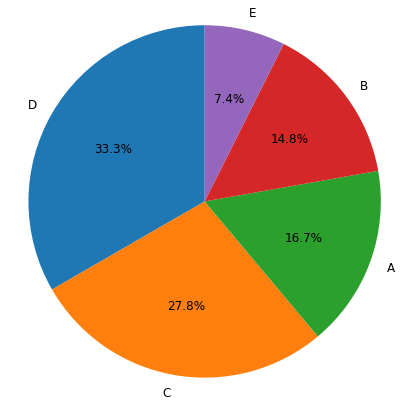

In [346]:
types = stores['type'].value_counts()


plt.close('all')
plt.figure(figsize=(7,7))
matplotlib.rcParams['font.size'] = 12.0
plt.pie(types, labels=types.index.values,autopct='%1.1f%%',startangle=90)
plt.axis('equal') 
plt.show()

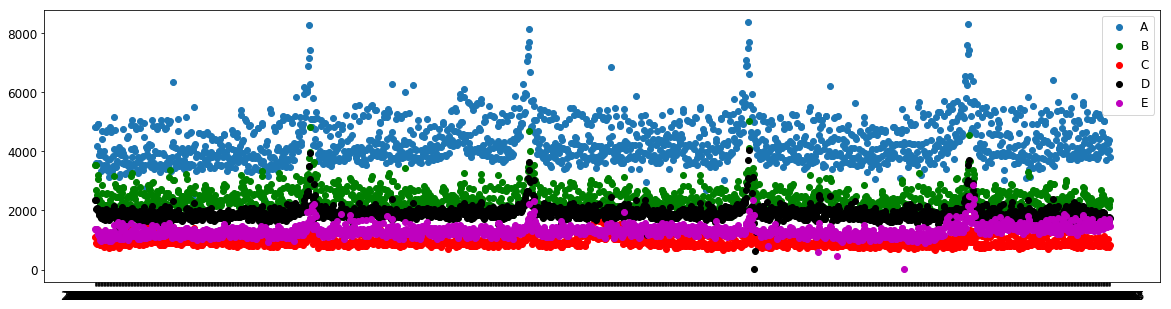

In [330]:
transactions['date'] = transactions['date'].map(lambda x: )

plt.close('all')
plt.figure(figsize=(20,5))

plt.close('all')
plt.figure(figsize=(20,5))
plt.plot_date(x=transactions['date'].tolist(), y=transactions['44'], label='A')
plt.plot_date(x=transactions['date'].tolist(), y=transactions['11'], color='g', label='B')
plt.plot_date(x=transactions['date'].tolist(), y=transactions['13'], color='r', label='C')
plt.plot_date(x=transactions['date'].tolist(), y=transactions['2'], color='k', label='D')
plt.plot_date(x=transactions['date'].tolist(), y=transactions['43'], color='m', label='E')
plt.legend()
plt.show()


# Items

In [119]:
items = pd.read_csv('items.csv', header=0)
items.head()

,item_nbr,family,class,perishable
0,96995,GROCERY I,1093,0
1,99197,GROCERY I,1067,0
2,103501,CLEANING,3008,0
3,103520,GROCERY I,1028,0
4,103665,BREAD/BAKERY,2712,1


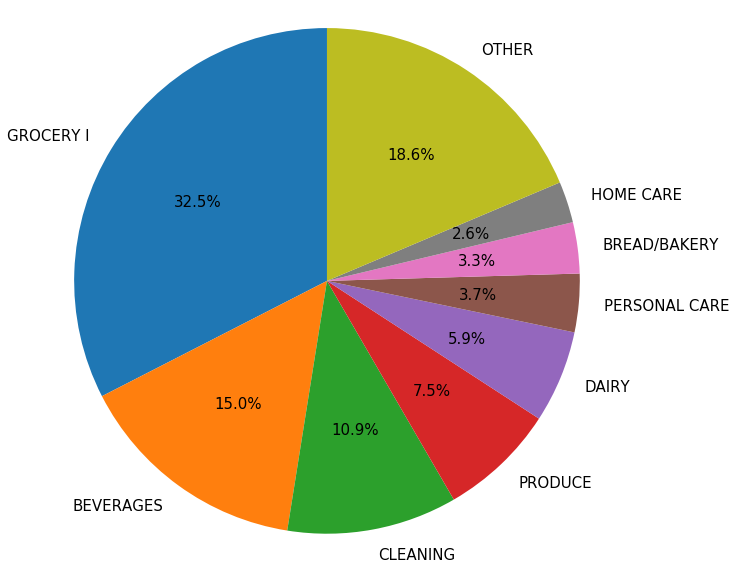

In [137]:
sizes = items['family'].value_counts()
other = sizes[sizes < 100]
sizes_adj = sizes[sizes >=100]
sizes_adj['OTHER'] = other.sum()

plt.figure(figsize=(10,10))
matplotlib.rcParams['font.size'] = 15.0
labels = sizes_adj.index.values
plt.pie(sizes_adj, labels=labels,autopct='%1.1f%%',startangle=90)
plt.axis('equal') 
plt.show()

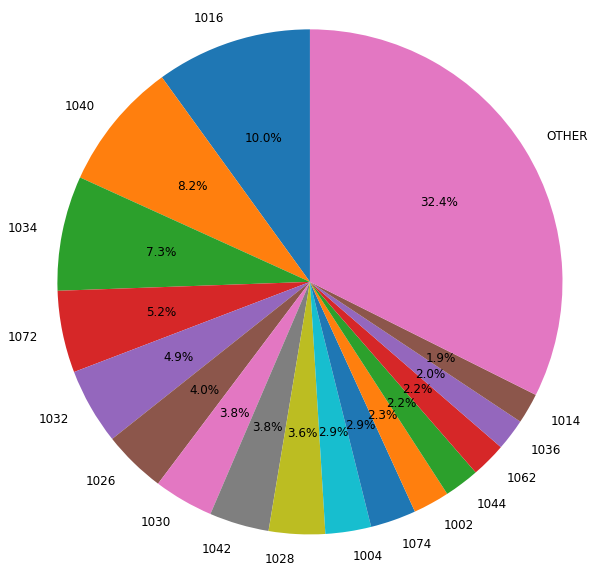

In [142]:
classes = items[items['family']=='GROCERY I']['class'].value_counts()

other = classes[classes < 25]
classes_adj = classes[classes >=25]
classes_adj['OTHER'] = other.sum()


plt.close('all')
plt.figure(figsize=(10,10))
matplotlib.rcParams['font.size'] = 12.0
labels = classes_adj.index.values
plt.pie(classes_adj, labels=labels,autopct='%1.1f%%',startangle=90)
plt.axis('equal') 
plt.show()

# Unit Sales (Train Data)

In [118]:
rawtrain = pd.read_csv('train.csv', header=0, low_memory=False)

In [32]:
unitsales = pd.read_csv('train_finalclean.csv', header=0)
unitsales.head()

,Unnamed: 0,date,103665,105574,105575,108079,108701,108786,108797,108952,...,2011470,2123463,2126842,2011448,2011468,2122818,2011459,2126944,2123839,2011451
0,0,2013-01-01,0.002695,0.007529,0.015237,0.001001,0.002604,0.007397,0.003323,0.001967,...,0.0006,0.000387,0.000651,0.000483,0.000511,0.001126,0.000369,0.000578,0.001404,0.000367
1,1,2013-01-02,0.002569,0.007665,0.015311,0.000993,0.002597,0.007396,0.003358,0.002043,...,0.0006,0.000387,0.000651,0.000483,0.000511,0.001126,0.000369,0.000578,0.001404,0.000367
2,2,2013-01-03,0.003084,0.006300,0.014250,0.001213,0.002559,0.006779,0.003394,0.002101,...,0.0006,0.000387,0.000651,0.000483,0.000511,0.001126,0.000369,0.000578,0.001404,0.000367
3,3,2013-01-04,0.003341,0.005121,0.015815,0.001328,0.002505,0.007314,0.002905,0.002091,...,0.0006,0.000387,0.000651,0.000483,0.000511,0.001126,0.000369,0.000578,0.001404,0.000367
4,4,2013-01-05,0.003024,0.005860,0.015216,0.001135,0.002398,0.007509,0.003547,0.002214,...,0.0006,0.000387,0.000651,0.000483,0.000511,0.001126,0.000369,0.000578,0.001404,0.000367


Counts
* on promotion - also plot as density
* negative

Boxplots: unit sales by store


In [241]:
totals = rawtrain.groupby('date')['unit_sales'].sum()

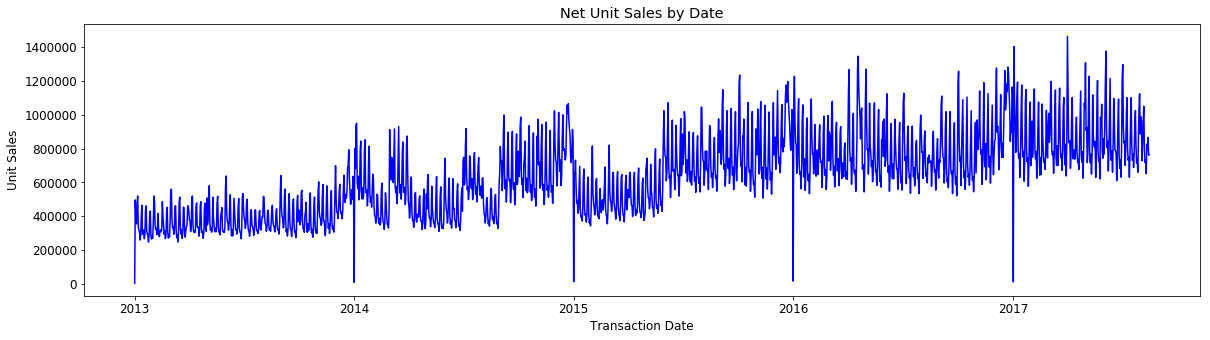

In [318]:
totals.index = totals.index.to_datetime()

plt.close('all')

plt.figure(figsize=(20,5))
#plt.plot_date(totals.index.values, totals, c = 'blue')
plt.plot(totals.index.values, totals, c = 'blue')


plt.title('Net Unit Sales by Date')
plt.xlabel('Transaction Date')
plt.ylabel('Unit Sales')

plt.show()

In [285]:
item_totals = rawtrain.groupby('item_nbr')['unit_sales'].sum()

In [302]:
item_totals_df=pd.DataFrame(columns=['item_nbr','count'])
item_totals_df['item_nbr'] = item_totals.index.values
item_totals_df['count'] = item_totals.values
item_totals_df.set_index('item_nbr')

,count
item_nbr,
96995,10143.000
99197,17870.000
103501,164753.000
103520,201117.000
103665,219669.000
105574,522163.000
105575,865894.000
105576,582947.000
105577,187349.000


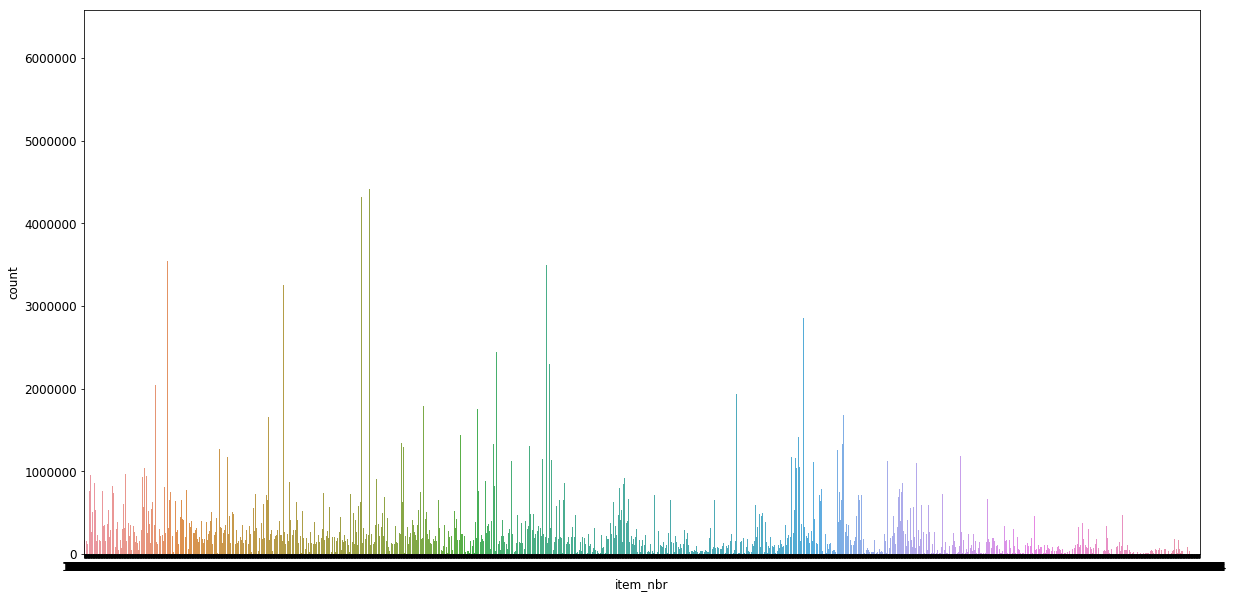

In [362]:
plt.close('all')
fig,ax=plt.subplots(figsize=(20, 10))

sns.barplot(x=item_totals_df['item_nbr'], y=item_totals_df['count'], data=item_totals_df)

plt.show()

In [ ]:
rawtrain['onpromotion'] = rawtrain['onpromotion'].fillna('Null')

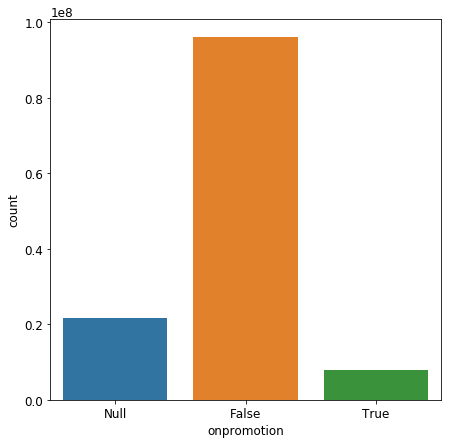

In [291]:
plt.close('all')
fig,ax=plt.subplots(figsize=(7, 7))
sns.countplot(x=rawtrain['onpromotion'], data=rawtrain)
plt.show()

In [311]:
nullpromo = rawtrain[rawtrain['onpromotion']=='Null']
falsepromo = rawtrain[rawtrain['onpromotion']==False]
truepromo = rawtrain[rawtrain['onpromotion']==True]
nullpromo = nullpromo['unit_sales']
falsepromo = falsepromo['unit_sales']
truepromo = truepromo['unit_sales']

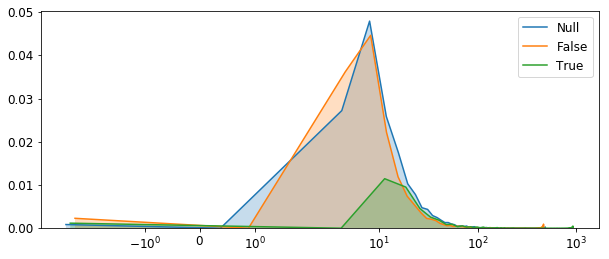

In [361]:
truepromo= truepromo[:10000]
nullpromo = nullpromo[:10000]
falsepromo = falsepromo[:10000]

plt.close('all')
fig,ax=plt.subplots(figsize=(10, 4))
ax.set(xscale="symlog")

sns.kdeplot(nullpromo, shade=True, label='Null')
sns.kdeplot(falsepromo, shade=True, label='False')
sns.kdeplot(truepromo, shade=True, label='True')

plt.show()

# What items have increased sales on holidays?

In [351]:
len(truepromo)

7810622